UC Berkeley Sutardja Dai Hall
IOT - Smart Building System Study

Dataset used for study can be found here:
https://www.kaggle.com/datasets/ranakrc/smart-building-system
Floorplans can be found here:
https://citris-uc.org/about/sutardja-dai-hall/about-facilities/floorplans/

Context
This dataset is collected from 255 sensor time series, instrumented in 51 rooms in 4 floors of the Sutardja Dai Hall(SDH) at UC Berkeley. It can be used to investigate patterns in physical properties of a room in a building. Moreover, it can also be used for experiments relating to Internet-of-Things (IoT), sensor fusion network or time-series tasks. This dataset is suitable for both supervised (classification and regression) and unsupervised learning (clustering) tasks.

Content
Each room includes 5 types of measurements: CO2 concentration, room air humidity, room temperature, luminosity, and PIR motion sensor data, collected over a period of one week from Friday, August 23, 2013 to Saturday, August 31, 2013. The PIR motion sensor is sampled once every 10 seconds and the remaining sensors are sampled once every 5 seconds. Each file contains the timestamps (in Unix Epoch Time) and actual readings from the sensor.

The passive infrared sensor (PIR sensor) is an electronic sensor that measures infrared (IR) light radiating from objects in its field of view, which measures the occupancy in a room. Approximately 6% of the PIR data is non-zero, indicating an occupied status of the room. The remaining 94% of the PIR data is zero, indicating an empty room.

STUDY SUMMARY:

- Initial Thesis: We can accurately define a given room occupancy from Temp, CO2, Humidity, Luminosity, PIR motion sensor data.
- Prove it through Data Analysis
- Through Machine Learning, we can predict patterns and trends in order improve quality of life for users


This Study's goal is to help the company's core missions:
- High-level Goal: Improve Energy Efficiency for a given Room, Building, Housing, Office Building complex and Quality of life for its users
- Low-level Goal: Command-Control Air Flow + Temperature Control to accomodate users based on pre-determined requirements.

STUDY'S LIMITATIONS:
- Time Frame: 1 week, which is short and will not allow us identify key trends such as Seasonality, Periodicity based on actual weather and seasons, but also human patterns (Holidays, Course Schedules, Weekly meetings, etc.)
- Spatiality: Which might be the most important/interesting. In order to introduce it as a feature, we would need additional data such as:
Weather data, Geolocation of all the rooms, Information on windows and how natural light can influence our data. 
A quick research allowed me to find the floorplans which can be converted to a GeoJSON Map file which can then be used through Python library Folium. This however would require extensive work which I consider out of scope for now.

Here is an example of floorplan for the 4th floor of the SDH Building which could be converted later on to a GeoJSON file.

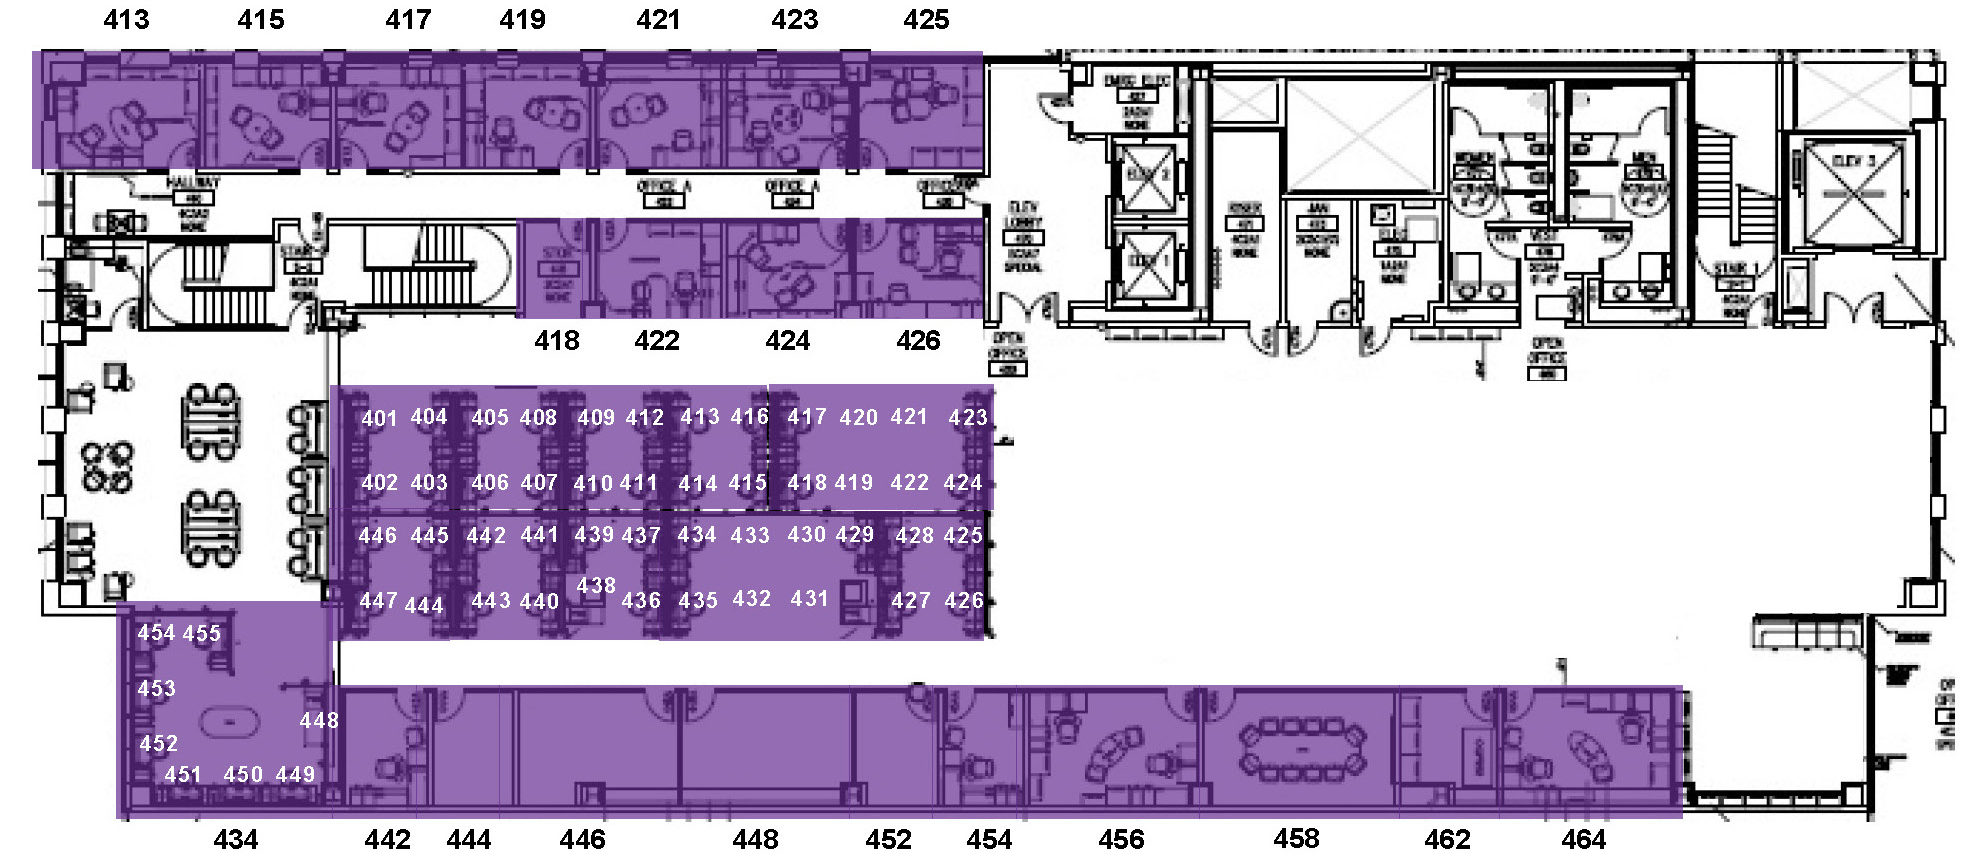

In [10]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
%matplotlib inline
import missingno as msno

#To avoid warnings
import warnings
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('./BerkeleyData/KETI'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./BerkeleyData/KETI\README.txt
./BerkeleyData/KETI\413\co2.csv
./BerkeleyData/KETI\413\humidity.csv
./BerkeleyData/KETI\413\light.csv
./BerkeleyData/KETI\413\pir.csv
./BerkeleyData/KETI\413\temperature.csv
./BerkeleyData/KETI\415\co2.csv
./BerkeleyData/KETI\415\humidity.csv
./BerkeleyData/KETI\415\light.csv
./BerkeleyData/KETI\415\pir.csv
./BerkeleyData/KETI\415\temperature.csv
./BerkeleyData/KETI\417\co2.csv
./BerkeleyData/KETI\417\humidity.csv
./BerkeleyData/KETI\417\light.csv
./BerkeleyData/KETI\417\pir.csv
./BerkeleyData/KETI\417\temperature.csv
./BerkeleyData/KETI\419\co2.csv
./BerkeleyData/KETI\419\humidity.csv
./BerkeleyData/KETI\419\light.csv
./BerkeleyData/KETI\419\pir.csv
./BerkeleyData/KETI\419\temperature.csv
./BerkeleyData/KETI\421\co2.csv
./BerkeleyData/KETI\421\humidity.csv
./BerkeleyData/KETI\421\light.csv
./BerkeleyData/KETI\421\pir.csv
./BerkeleyData/KETI\421\temperature.csv
./BerkeleyData/KETI\422\co2.csv
./BerkeleyData/KETI\422\humidity.csv
./BerkeleyData/KETI\422\l

In [11]:
def read_data(DataFrame):
    data = pd.read_csv(file_path,header = 0)
    data["date"] = pd.to_datetime(data["date"])
    data["year"] = data["date"].dt.year
    data["month"] = data["date"].dt.month
    data["day"] = data["date"].dt.day
    data["hour"] = data["date"].dt.hour
    data["minute"] = data["date"].dt.minute
    data["second"] = data["date"].dt.second
    data['weekday'] = data[['date']].apply(lambda x: dt.datetime.strftime(x['date'], '%A'), axis=1)
    return data

def plot_signal(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%A, %b %d'))
    ax.set_xlim([min(x) , max(x)])
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.grid(True)

In [12]:
#Create Master DataFrame
df = pd.DataFrame()

#Order data and concatenate it
for dirname, _, filenames in os.walk('./BerkeleyData/KETI'):         
    if len(filenames) > 1:
        room_df = pd.DataFrame()
        room_id = dirname.split('/')[-1] #get rid of root path
        room_id = room_id[5:] #cleans up room_id
        print('Room ID: ', room_id)
        for i, filename in enumerate(filenames):
#             print(filename)
            feat_name = filename.split('.')[0]
            tmp_df = pd.read_csv(os.path.join(dirname, filename), names=[feat_name], header=0)             
            if i == 0:
                room_df = tmp_df              
            else:
                room_df = pd.concat([room_df, tmp_df], axis=1, join="outer") 
        room_df['room_ID'] = [room_id]*room_df.shape[0]       
        df = pd.concat([df, room_df], axis=0)

Room ID:  413
Room ID:  415
Room ID:  417
Room ID:  419
Room ID:  421
Room ID:  422
Room ID:  423
Room ID:  424
Room ID:  442
Room ID:  446
Room ID:  448
Room ID:  452
Room ID:  454
Room ID:  456
Room ID:  458
Room ID:  462
Room ID:  510
Room ID:  511
Room ID:  513
Room ID:  552
Room ID:  554
Room ID:  556
Room ID:  558
Room ID:  562
Room ID:  564
Room ID:  621
Room ID:  621A
Room ID:  621C
Room ID:  621D
Room ID:  621E
Room ID:  640
Room ID:  644
Room ID:  648
Room ID:  656A
Room ID:  656B
Room ID:  664
Room ID:  666
Room ID:  668
Room ID:  717
Room ID:  719
Room ID:  721
Room ID:  722
Room ID:  723
Room ID:  724
Room ID:  726
Room ID:  734
Room ID:  746
Room ID:  748
Room ID:  752
Room ID:  754
Room ID:  776


In [13]:
print("Shape: ", (df.count(), len(df.columns)))
#This Data Frame contains all 5 sensor data for all 51 rooms together. 
#This dataset can then be sliced into smaller subsets (Floors, or Room type - e.g. Conference room/Windows or no Windows, etc.)

Shape:  (co2             6573957
humidity        6571414
light           6571412
pir             3593902
temperature     6571454
room_ID        14381528
dtype: int64, 6)


In [14]:
#Usual EDA checks and balances
def check_df(dataframe, head=5):
    print("--DESCRIBE--")
    print(dataframe.describe())
    print("-- Shape --")
    print(dataframe.shape)
    print("-- Types --")
    print(dataframe.dtypes)
    print("-- Head --")
    print(dataframe.head(head))
    print("-- Tail --")
    print(dataframe.tail(head))
    print("-- NA --")
    print(dataframe.isnull().sum())
    print("-- Quantiles --")
    print(dataframe.quantile([0, 0.05, 0.50, 0.75, 0.95, 1]).T)
check_df(df)

--DESCRIBE--
                co2      humidity         light           pir   temperature
count  6.573957e+06  6.571414e+06  6.571412e+06  3.593902e+06  6.571454e+06
mean   4.110064e+02  5.674775e+01  8.226118e+01  1.754278e+00  2.397012e+01
std    1.035153e+02  4.307880e+00  3.101546e+02  1.934551e+01  2.119065e+01
min    8.000000e+00 -5.009600e+02  0.000000e+00  0.000000e+00 -4.010000e+01
25%    3.520000e+02  5.398000e+01  3.000000e+00  0.000000e+00  2.253000e+01
50%    4.100000e+02  5.701000e+01  5.000000e+00  0.000000e+00  2.311000e+01
75%    4.630000e+02  5.974000e+01  3.000000e+01  0.000000e+00  2.371000e+01
max    1.699000e+03  7.191000e+01  3.055100e+04  3.445600e+04  5.792700e+02
-- Shape --
(14381528, 6)
-- Types --
co2            float64
humidity       float64
light          float64
pir            float64
temperature    float64
room_ID         object
dtype: object
-- Head --
              co2  humidity  light  pir  temperature room_ID
1377299108  495.0     45.34   97.0  NaN  

From the start we can identify a massive amount of both missing and null data. Quantiles tell us roughly 

In [15]:
#Quick Exploratory plotting of the data in order to get a feel for it visually
#sns.displot(df.co2)

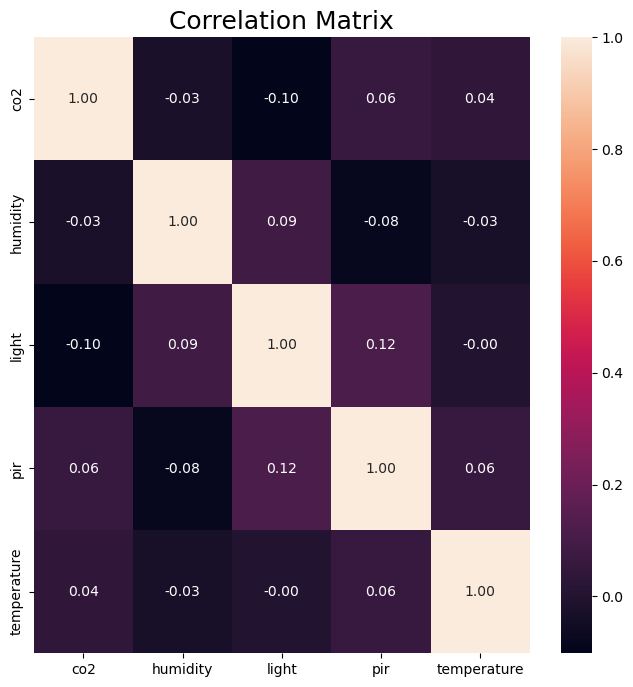

In [16]:
f, ax = plt.subplots(figsize= [8,8])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)
ax.set_title("Correlation Matrix", fontsize=18)
plt.show()

In [17]:
df[df.room_ID == '458'].head(50)

,co2,humidity,light,pir,temperature,room_ID
1377299123,534.0,NaN,NaN,NaN,NaN,458
1377299127,531.0,NaN,NaN,NaN,NaN,458
1377299130,536.0,52.97,6.0,0.0,22.96,458
1377299134,527.0,NaN,NaN,NaN,NaN,458
1377299139,532.0,NaN,NaN,NaN,NaN,458
1377299144,524.0,NaN,NaN,NaN,NaN,458
1377299149,524.0,NaN,NaN,NaN,NaN,458
1377299154,530.0,NaN,NaN,NaN,NaN,458
1377299159,534.0,NaN,NaN,NaN,NaN,458
1377299164,534.0,NaN,NaN,NaN,NaN,458


<AxesSubplot:>

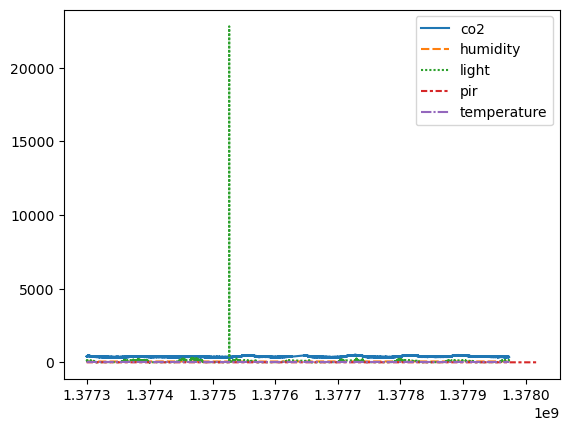

In [18]:
sns.lineplot(data = df[df.room_ID == '717'])

<AxesSubplot:ylabel='temperature'>

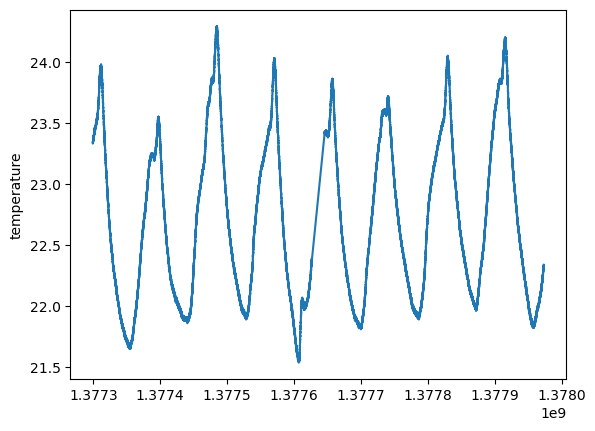

In [19]:
sns.lineplot(data = df[df.room_ID == '717'].temperature)

<AxesSubplot:ylabel='co2'>

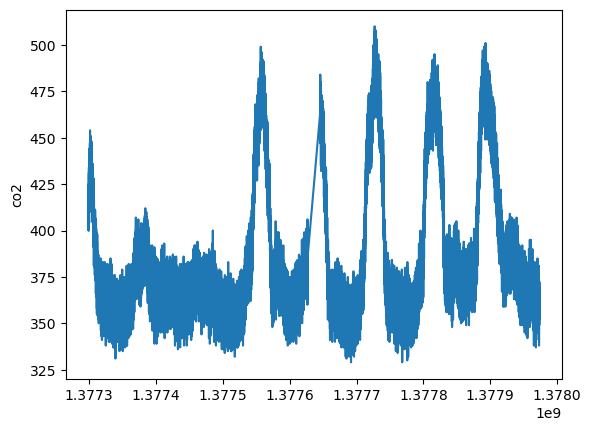

In [20]:
sns.lineplot(data = df[df.room_ID == '717'].co2)

<AxesSubplot:ylabel='pir'>

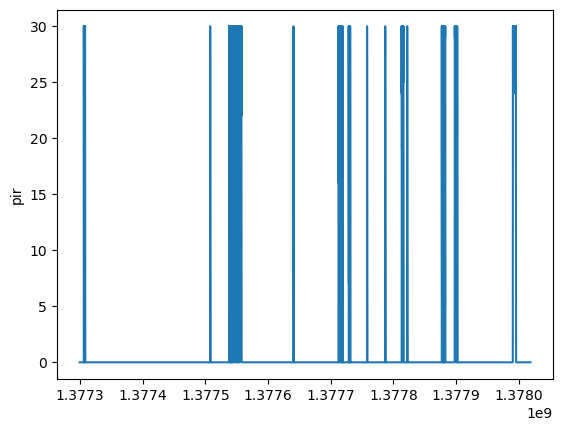

In [21]:
sns.lineplot(data = df[df.room_ID == '458'].pir)

In [22]:
#sns.lineplot(data = df[df.room_ID == '458'].light)

In [23]:
#sns.lineplot(data = df[df.room_ID == '458'].co2)

In [24]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14381528 entries, 1377299108 to 1377948612
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   co2          float64
 1   humidity     float64
 2   light        float64
 3   pir          float64
 4   temperature  float64
 5   room_ID      object 
dtypes: float64(5), object(1)
memory usage: 768.1+ MB


,co2,humidity,light,pir,temperature,room_ID
1377299108,495.0,45.34,97.0,NaN,23.94,413
1377299110,487.0,NaN,NaN,NaN,NaN,413
1377299127,496.0,NaN,NaN,0.0,NaN,413
1377299130,495.0,NaN,NaN,0.0,NaN,413
1377299134,500.0,NaN,NaN,NaN,NaN,413


In [25]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns
missing_values_table(df, True)

               n_miss  ratio
pir          10787626  75.01
light         7810116  54.31
humidity      7810114  54.31
temperature   7810074  54.31
co2           7807571  54.29


['co2', 'humidity', 'light', 'pir', 'temperature']

<AxesSubplot:>

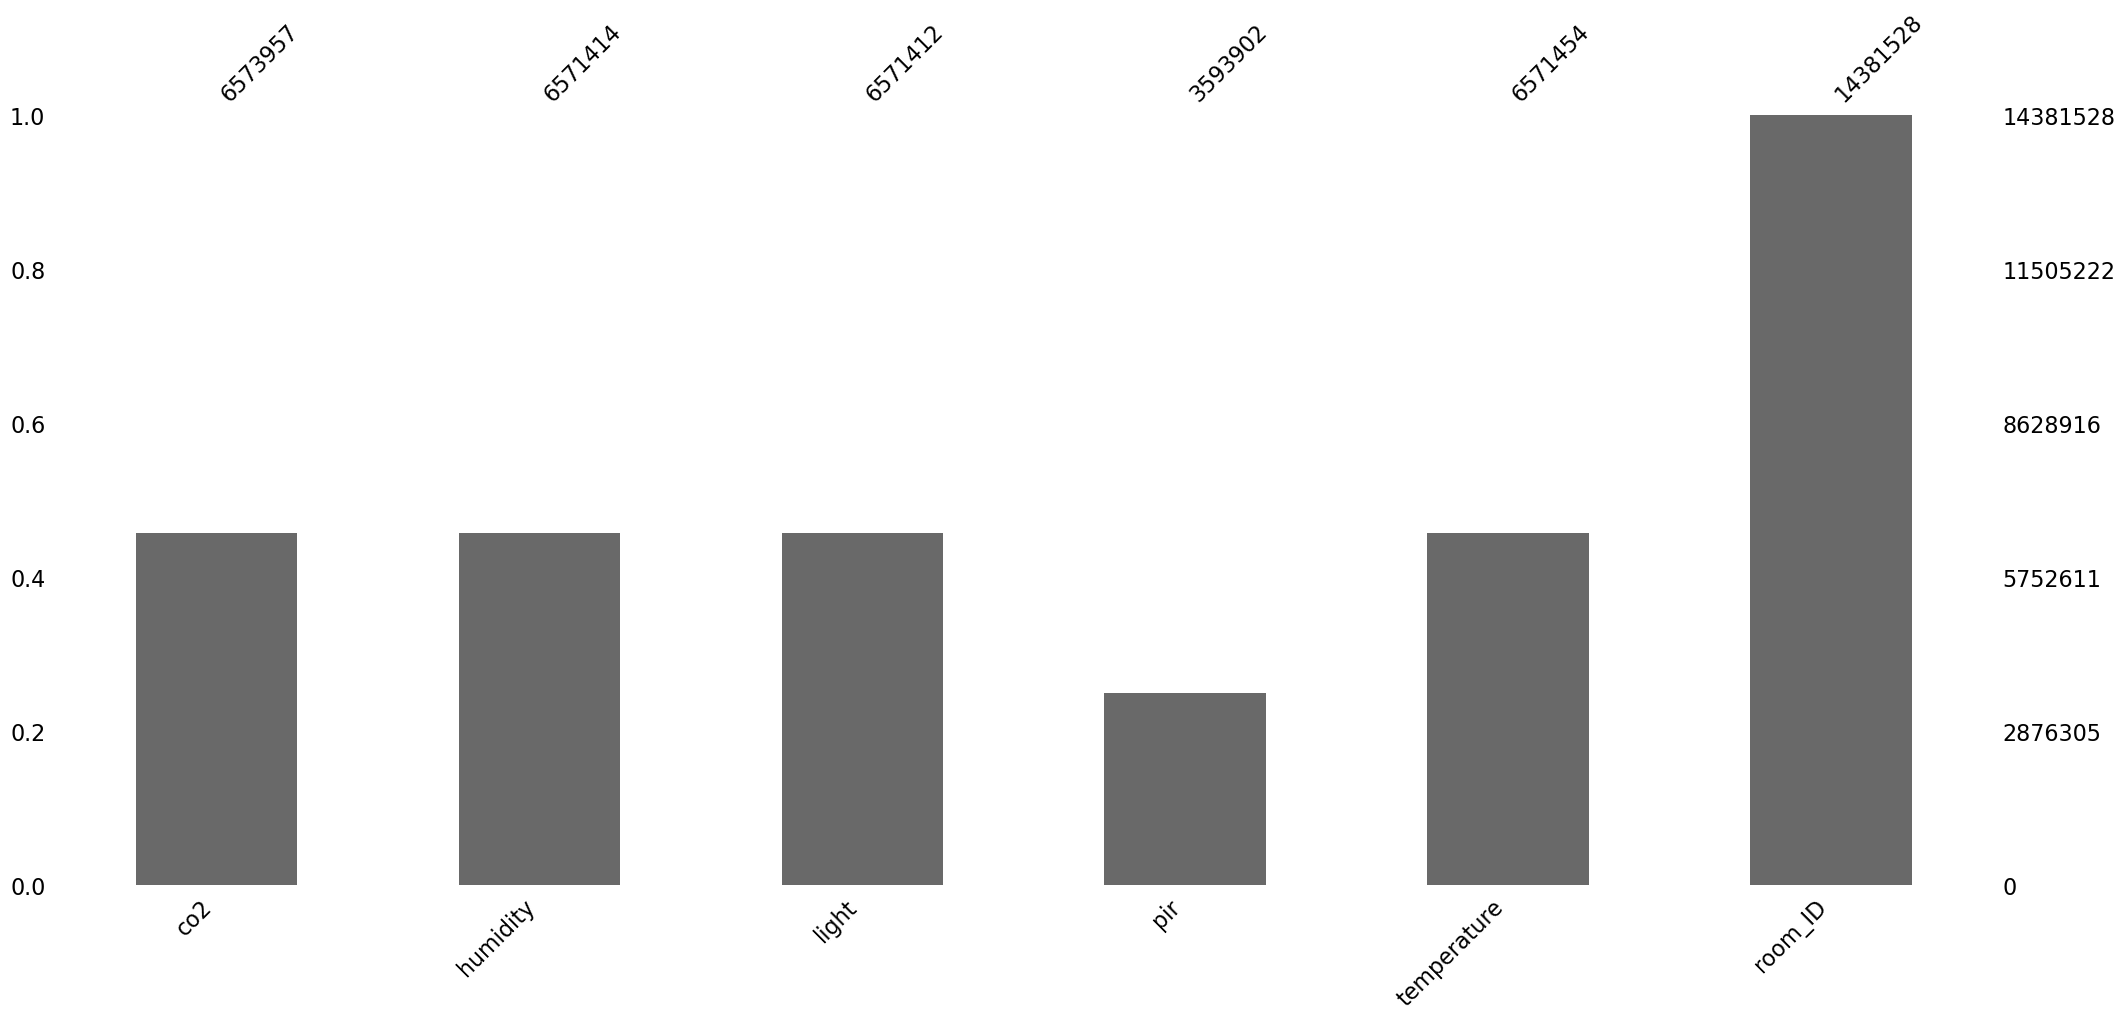

In [26]:
import missingno as msno
msno.bar(df)

The reason we have so many missing data is probably due to different acquisition time, therefore some rows do not return data.
PIR sensor seems to have the longest acquisition period time

In [27]:
df

,co2,humidity,light,pir,temperature,room_ID
1377299108,495.0,45.34,97.0,NaN,23.94,413
1377299110,487.0,NaN,NaN,NaN,NaN,413
1377299127,496.0,NaN,NaN,0.0,NaN,413
1377299130,495.0,NaN,NaN,0.0,NaN,413
1377299134,500.0,NaN,NaN,NaN,NaN,413
...,...,...,...,...,...,...
1377565664,NaN,NaN,NaN,NaN,24.57,776
1377595353,NaN,NaN,NaN,NaN,22.15,776
1377597253,NaN,NaN,NaN,NaN,22.04,776
1377837160,NaN,NaN,NaN,NaN,23.95,776


In [28]:
#Create Clean DataFrame
df_notna = pd.DataFrame()
df_notna = df.dropna()

In [29]:
df_notna

,co2,humidity,light,pir,temperature,room_ID
1377457084,459.0,52.75,103.0,0.0,23.48,413
1377457963,456.0,52.71,104.0,0.0,23.50,413
1377462175,446.0,52.43,105.0,0.0,23.54,413
1377464765,463.0,52.30,111.0,0.0,23.56,413
1377467333,458.0,52.21,159.0,0.0,23.65,413
...,...,...,...,...,...,...
1377965997,496.0,56.67,153.0,0.0,23.02,776
1377966724,504.0,56.42,157.0,0.0,23.16,776
1377968206,497.0,55.86,141.0,0.0,23.43,776
1377968924,508.0,55.73,129.0,0.0,23.55,776


In [30]:
missing_values_table(df_notna, True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

<AxesSubplot:ylabel='co2'>

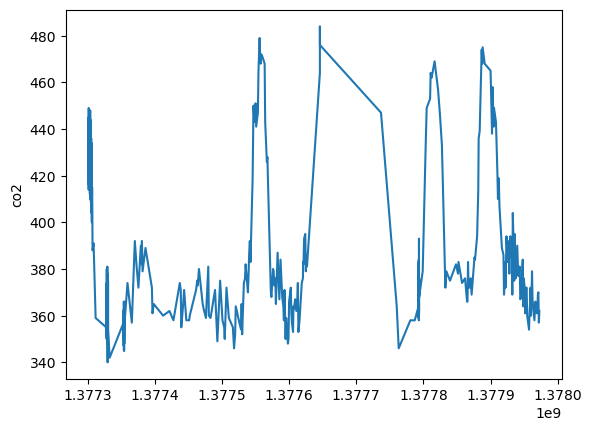

In [31]:
sns.lineplot(data = df_notna[df_notna.room_ID == '717'].co2)

In [32]:
#convert dates 
df_notna.index = pd.to_datetime(df_notna.index,unit='s')
df_notna.head()

,co2,humidity,light,pir,temperature,room_ID
2013-08-25 18:58:04,459.0,52.75,103.0,0.0,23.48,413
2013-08-25 19:12:43,456.0,52.71,104.0,0.0,23.50,413
2013-08-25 20:22:55,446.0,52.43,105.0,0.0,23.54,413
2013-08-25 21:06:05,463.0,52.30,111.0,0.0,23.56,413
2013-08-25 21:48:53,458.0,52.21,159.0,0.0,23.65,413


In [33]:
check_df(df_notna)

--DESCRIBE--
                 co2       humidity          light            pir  \
count  135378.000000  135378.000000  135378.000000  135378.000000   
mean      399.271780      56.892174     140.574399       1.666467   
std       119.084173       3.611653     470.700112       6.507517   
min        62.000000      42.120000       0.000000       0.000000   
25%       334.000000      54.420000       4.000000       0.000000   
50%       408.000000      57.280000       4.000000       0.000000   
75%       464.000000      59.100000      37.000000       0.000000   
max      1223.000000      71.290000    2397.000000      30.000000   

         temperature  
count  135378.000000  
mean       23.415878  
std        11.836722  
min        20.200000  
25%        22.610000  
50%        23.110000  
75%        23.660000  
max       579.270000  
-- Shape --
(135378, 6)
-- Types --
co2            float64
humidity       float64
light          float64
pir            float64
temperature    float64
room_ID

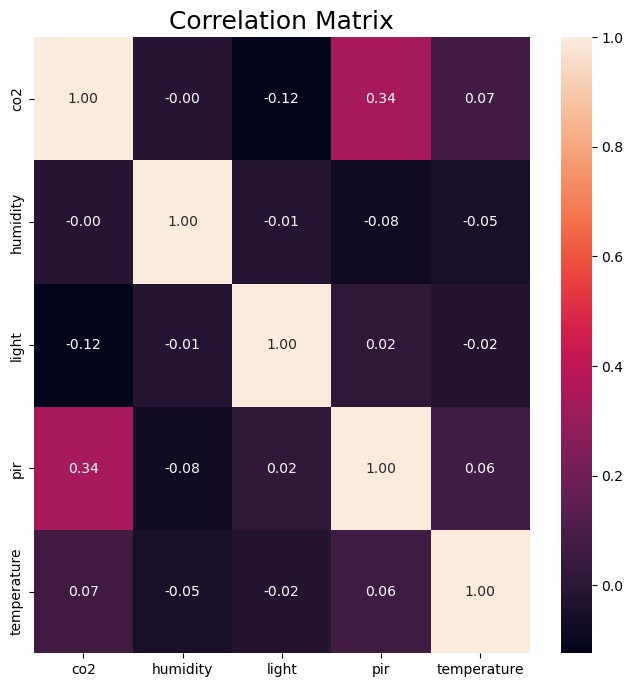

In [34]:
#Apply correlation Matrix to the cleaned dataset for the whole building
f, ax = plt.subplots(figsize= [8,8])
sns.heatmap(df_notna.corr(), annot=True, fmt=".2f", ax=ax)
ax.set_title("Correlation Matrix", fontsize=18)
plt.show()

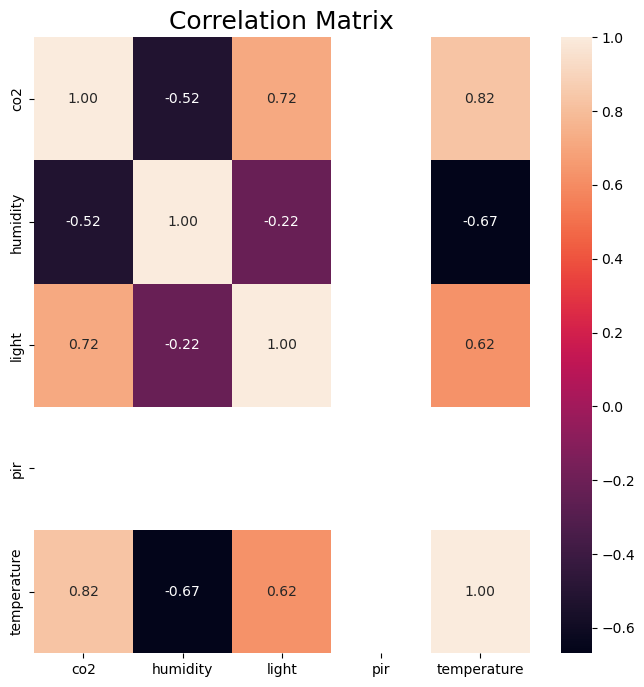

In [27]:
#Apply correlation Matrix to a specific room in the building. Here, the conference room 717
f, ax = plt.subplots(figsize= [8,8])
sns.heatmap(df_notna[df_notna.room_ID == '715'].corr(), annot=True, fmt=".2f", ax=ax)
ax.set_title("Correlation Matrix", fontsize=18)
plt.show()

Here, Room 717 doesn't seem to have a PIR sensor, however we can identify clear correlation between these features.
At this stage of the exploratory analysis, we recognize spaciality of a given room plays a key role in data interpretation. We can also draw conclusion that Temperature is not a good indicator of occupancy, as the weather remains the main contributor, 

However, measuring relative Temperature from the average of the building could prove more impactful. Here again, different floors might have different average temperatures.
A quick Google search allowed me to get further iniformation on the possible impact of sunlight of different rooms.

https://www.google.com/maps/place/Sutardja+Dai+Hall/@37.8749692,-122.2585358,19.83z/data=!4m12!1m6!3m5!1s0x80857d5f5afe8c2d:0x78496969813be27a!2sSutardja+Dai+Hall!8m2!3d37.8750434!4d-122.2583178!3m4!1s0x80857d5f5afe8c2d:0x78496969813be27a!8m2!3d37.8750434!4d-122.2583178

Next steps could be to add external weather conditions and ephemeral position (Sun course equations)

https://www.researchgate.net/publication/232203657_Orbital_Ephemerides_of_the_Sun_Moon_and_Planets
https://eclipse.gsfc.nasa.gov/TYPE/ephemeris.html


In [28]:
#Create a binary Target_pir feature which returns 0 when PIR sensor returns 0
#                                                 1 when PIR sensor returns a non-zero value
def map_target(x):
    """Target 0: empty room
       Target 1: occupied room"""
    if x == 0 or not x:
        return 0
    else:
        return 1
        
df_notna['target_pir'] = df_notna['pir'].apply(map_target)

C:\Users\Brenn\AppData\Local\Temp\ipykernel_5552\1188528989.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notna['target_pir'] = df_notna['pir'].apply(map_target)


In [29]:
df_notna.describe()

,co2,humidity,light,pir,temperature,target_pir
count,135378.000000,135378.000000,135378.000000,135378.000000,135378.000000,135378.000000
mean,399.271780,56.892174,140.574399,1.666467,23.415878,0.067182
std,119.084173,3.611653,470.700112,6.507517,11.836722,0.250338
min,62.000000,42.120000,0.000000,0.000000,20.200000,0.000000
25%,334.000000,54.420000,4.000000,0.000000,22.610000,0.000000
50%,408.000000,57.280000,4.000000,0.000000,23.110000,0.000000
75%,464.000000,59.100000,37.000000,0.000000,23.660000,0.000000
max,1223.000000,71.290000,2397.000000,30.000000,579.270000,1.000000


<AxesSubplot:ylabel='target_pir'>

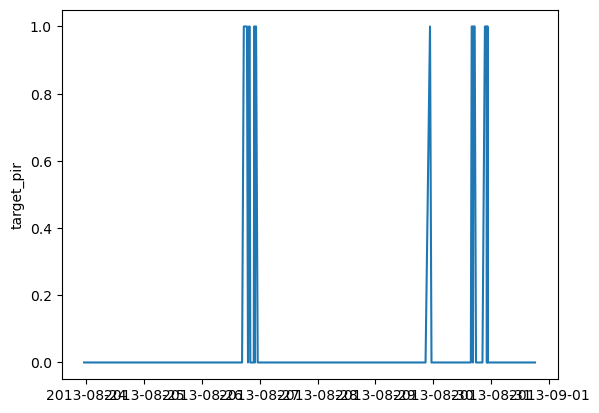

In [39]:
#Plot sensor data for room 458. Refering back to the floorplan, we can tell this is a Conference room with SOUTH direct exposure
#Let's see if we can draw conclusions visually

sns.lineplot(data=df_notna[df_notna.room_ID == '458'].target_pir)


<AxesSubplot:ylabel='temperature'>

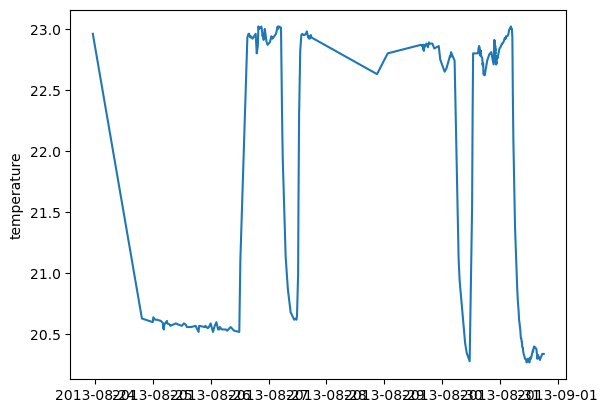

In [36]:
sns.lineplot(data = df_notna[df_notna.room_ID == '458'].temperature)

<AxesSubplot:ylabel='temperature'>

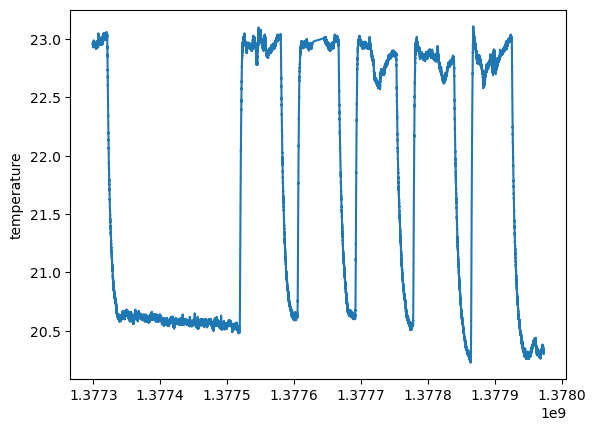

In [40]:
sns.lineplot(data = df[df.room_ID == '458'].temperature)

<AxesSubplot:ylabel='co2'>

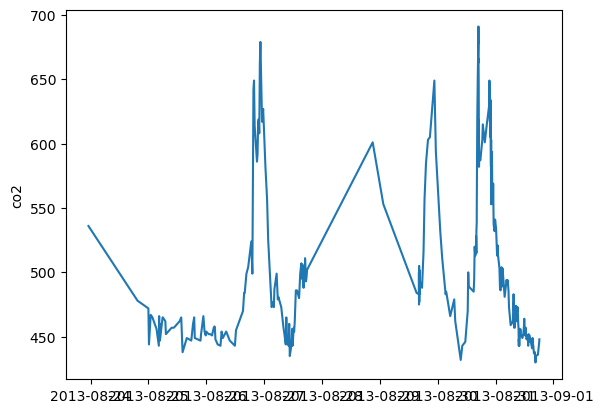

In [38]:
sns.lineplot(data=df_notna[df_notna.room_ID == '458'].co2)

<AxesSubplot:ylabel='co2'>

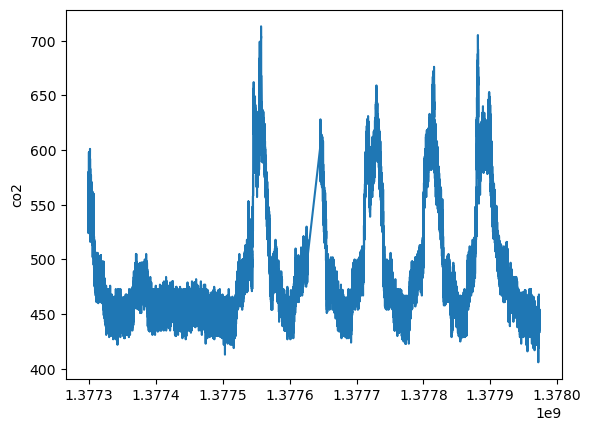

In [41]:
sns.lineplot(data = df[df.room_ID == '458'].co2)

<AxesSubplot:ylabel='pir'>

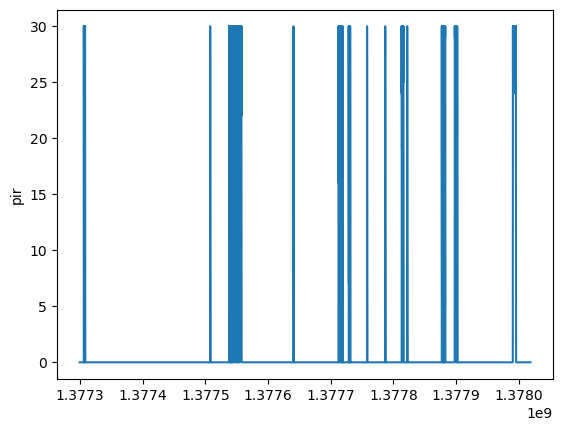

In [42]:
sns.lineplot(data = df[df.room_ID == '458'].pir)

C:\Users\Brenn\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


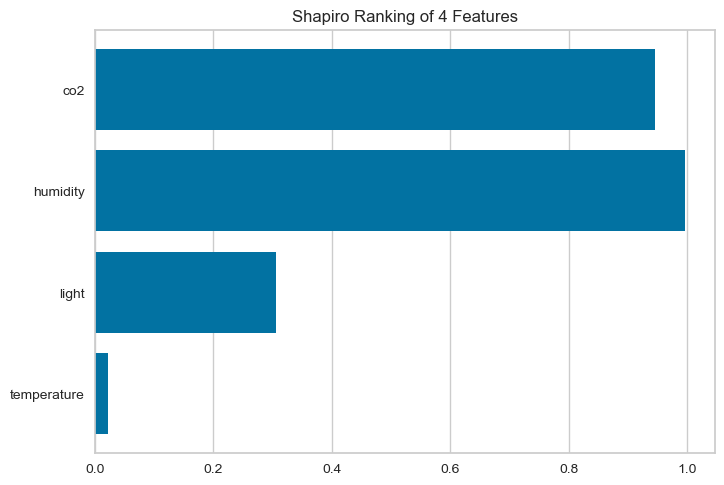

<AxesSubplot:title={'center':'Shapiro Ranking of 4 Features'}>

In [52]:
feature_names = ['co2', 'humidity', 'light', 'temperature',]
target_name = 'target_pir'
X = df_notna[feature_names]
y = df_notna['target_pir']

from yellowbrick.features import Rank1D
# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=feature_names, algorithm='shapiro')
visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # visualise

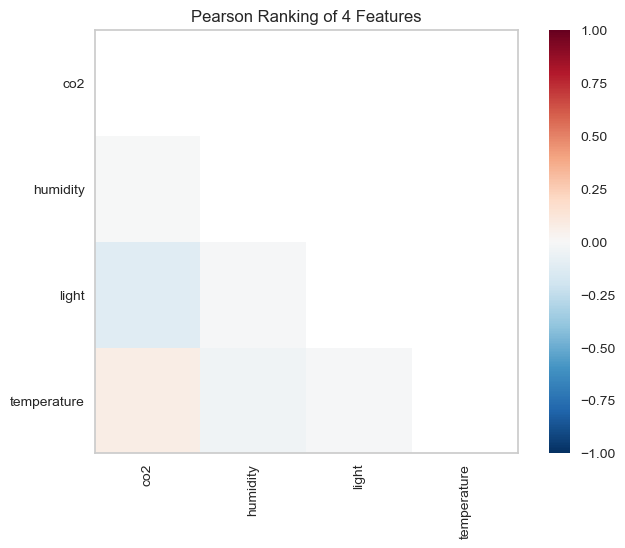

<AxesSubplot:title={'center':'Pearson Ranking of 4 Features'}>

In [48]:
from yellowbrick.features import Rank2D
# Instantiate the visualizer with the Pearson ranking algorithm
#visualizer = Rank2D(features=feature_names, algorithm='covariance') 
visualizer = Rank2D(features=feature_names, algorithm='pearson')
visualizer.fit(X, y)                
visualizer.transform(X)             
visualizer.poof()

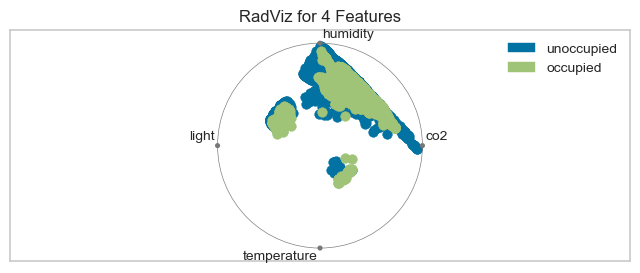

<AxesSubplot:title={'center':'RadViz for 4 Features'}>

In [49]:
#My favorite, features vs target visualization chart: THE FIFA CHART

from yellowbrick.features import RadViz
# Specify the features of interest and the classes of the target 
features = feature_names
classes = ['unoccupied', 'occupied']
# Instantiate the visualizer
visualizer = visualizer = RadViz(classes=classes, features=features,size = (800,300))
visualizer.fit(X, y)      
visualizer.transform(X)  
visualizer.poof()

We can see that Temperature and Light sensors, in current states, provide little to no information on Room Occupancy.
Whereas CO2 and Humidity have stronger correlations with motion sensor.
